In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path_with_dates = 'tourism_dataset_with_dates.csv' 
data = pd.read_csv(file_path_with_dates)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
 7   Date                     5989 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 374.4+ KB


In [3]:
data.head()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available,Date
0,oSPaWWeNtc,Australia,Cultural,528099,2.85,16675.88,Yes,2018-01-01
1,NXuJIxrlXO,China,Cultural,575123,1.50,214984.47,Yes,2018-01-02
2,nDyDiFVkkt,Egypt,Cultural,697121,2.28,579802.15,Yes,2018-01-02
3,aBzUcXPFOy,India,Historical,143401,4.45,395538.39,No,2018-01-03
4,MxHnpHjfmG,Australia,Nature,209522,3.61,690182.82,Yes,2018-01-03


In [4]:
# Prepare the data for Prophet
data = data.rename(columns={'Date': 'ds', 'Visitors': 'y'})
data['ds'] = pd.to_datetime(data['ds'])

In [5]:
# Split the data into training and testing sets (80-20 split)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# Initialize the Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

In [7]:
# Fit the model
model.fit(train_data)


19:28:34 - cmdstanpy - INFO - Chain [1] start processing
19:28:35 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=len(test_data), freq='D')


In [9]:
# Generate the forecast
forecast = model.predict(future)

In [10]:
# Evaluate the forecast using the test set
# Merge actual values with predictions for evaluation
forecast_evaluation = forecast[['ds', 'yhat']].merge(test_data[['ds', 'y']], on='ds', how='left')


In [11]:
# Merge forecast and actual data, ensuring alignment
forecast_evaluation = forecast[['ds', 'yhat']].merge(test_data[['ds', 'y']], on='ds', how='inner')

# Check if there are missing values in the merged dataset
print(f"Missing values in evaluation dataset:\n{forecast_evaluation.isna().sum()}")

# Ensure there are no NaN values before calculating metrics
forecast_evaluation = forecast_evaluation.dropna()

# Calculate evaluation metrics
mae = mean_absolute_error(forecast_evaluation['y'], forecast_evaluation['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_evaluation['y'], forecast_evaluation['yhat']))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Missing values in evaluation dataset:
ds      0
yhat    0
y       0
dtype: int64
Mean Absolute Error (MAE): 255869.86
Root Mean Squared Error (RMSE): 294377.07


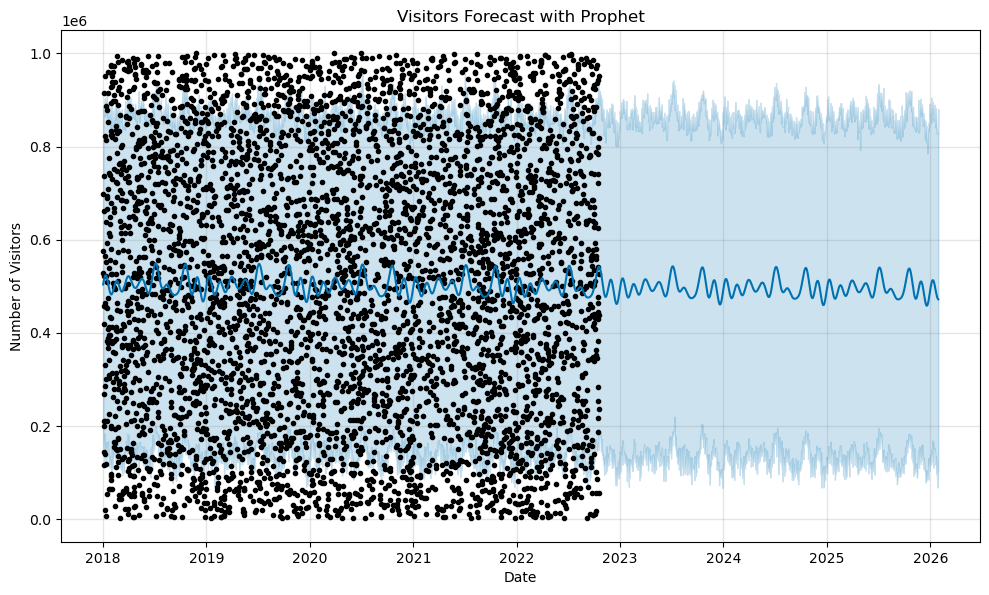

In [12]:
# Plot the forecast
model.plot(forecast)
plt.title("Visitors Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.show()

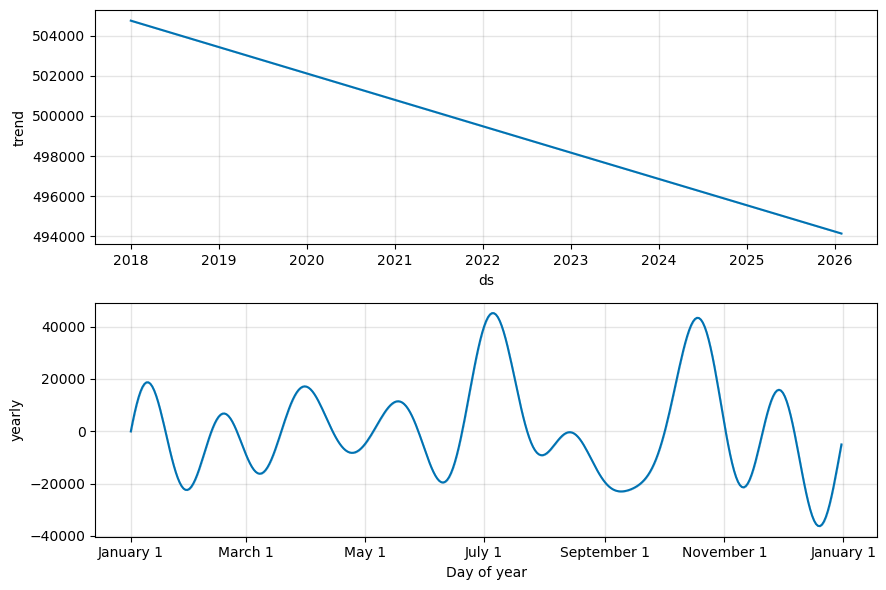

In [26]:
# Plot the components (trends, seasonality, etc.)
model.plot_components(forecast)
plt.show()